In [1]:
!pip install -q tensorflow==2.3.0

     |████████████████████████████████| 320.4MB 43kB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 2.9MB 43.0MB/s 
     |████████████████████████████████| 460kB 54.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [2]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 507), reused 1382 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 34.66 MiB/s, done.
Resolving deltas: 100% (507/507), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [3]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 7.2MB 9.0MB/s 
     |████████████████████████████████| 225kB 49.9MB/s 
     |████████████████████████████████| 15.3MB 208kB/s 
     |████████████████████████████████| 9.9MB 39.9MB/s 
     |████████████████████████████████| 296kB 50.7MB/s 
     |████████████████████████████████| 102kB 15.3MB/s 
     |████████████████████████████████| 27.4MB 118kB/s 
     |████████████████████████████████| 174kB 59.0MB/s 
     |████████████████████████████████| 3.9MB 45.2MB/s 
     |████████████████████████████████| 686kB 45.5MB/s 
     |████████████████████████████████| 358kB 55.0MB/s 
     |████████████████████████████████| 1.2MB 41.7MB/s 
     |████████████████████████████████| 10.3MB 46.4MB/s 
     |████████████████████████████████| 38.2MB 1.3MB/s 
     |████████████████████████████████| 645kB 45.6MB/s 
     |████████████████████████████████| 3.0MB 31.6MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
     |████████████████████████████████| 51kB 9.2M

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [3]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
import scipy
df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
                 compression='zip', low_memory=False)
df.shape

(1306122, 3)

In [4]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [5]:
df.head(20)


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


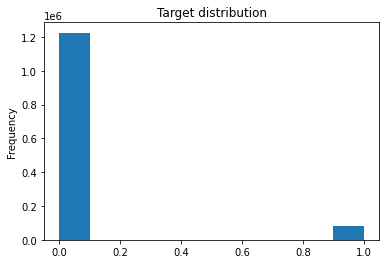

In [6]:
df.target.plot(kind='hist', title='Target distribution');

In [7]:
df['target'].value_counts()


0    1225312
1      80810
Name: target, dtype: int64

Since the text with label '1; are quite less in number so to balance the training data we are sampling 50000 points  from positve(label '1) and negative dataset(label '0) .

In [8]:
df_new=df[df['target']==0]
df_new1=df[df['target']==1]

In [9]:
df_new=df_new[['question_text','target']]
df_new1=df_new1[['question_text','target']]

In [10]:
df_zero=df_new.sample(n=50000)
df_one=df_new1.sample(n=50000)

In [11]:
frames=[df_one,df_zero]

In [12]:
result=pd.concat(frames)

In [13]:
result['target'].value_counts()


0    50000
1    50000
Name: target, dtype: int64

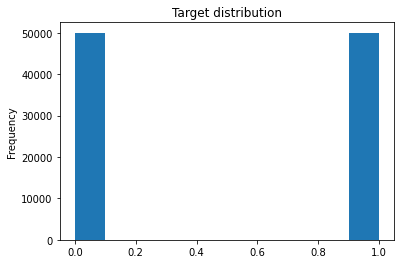

In [14]:
result.target.plot(kind='hist', title='Target distribution');

TARGET DISTRUBUTION AFTER RESAMPLING


In [15]:
df=result.sample(frac=1)

In [16]:
df.head(20)

,question_text,target
1089364,Why do some people stand with their feet both ...,0
1192201,How did Ronan Dunne become a key person for Ve...,0
1270751,Are there leaders in the African American comm...,1
903950,Why did White America have Martin Luther King ...,1
555803,Why do Liberals encourage race mixing?,1
800603,Why are liberals so dirty?,1
684319,Do school girls masturbate?,1
90539,Why does India call Kashmiris good people wher...,1
269705,How much does it cost to go on a cruise?,0
576819,Why are there so many people on Quora?,0


In [17]:
#CREATE TF.DATSETS FOR TRAINING AND VALIDATION
from sklearn.model_selection import train_test_split
train_df, remaining = train_test_split(df, random_state=42, train_size=0.9, stratify=df.target.values)
valid_df, _ = train_test_split(remaining, random_state=42, train_size=0.5, stratify=remaining.target.values)
train_df.shape, valid_df.shape

((90000, 2), (5000, 2))

In [18]:
print(train_df)

                                             question_text  target
724478   What can be done to improve the chances of a f...       0
1056350              How can I ask him to be my boyfriend?       0
911289   Is there anyone who is disappointed with their...       0
1009386  Why do most non-Chinese people not like the Ch...       1
760475   What does the phrase "Johnny Bravo whines abou...       0
...                                                    ...     ...
226375    Why do white girls get fat when they become old?       1
977894   What is the impact of Gerry Adams backing Jere...       0
45297          What was your reaction on 10th CBSE result?       0
1170339  Are reserved communities thinking of wiping ou...       1
487928   What are the pros and cons of joining defence ...       0

[90000 rows x 2 columns]


In [19]:

print(remaining)

                                             question_text  target
464765                              What is damping ratio?       0
383956                       How can make money very easy?       0
318447   Why are there so many of you out there in Quor...       1
166977   What is it that Democrats are so worried about...       1
138474   When most of the Indians consider Modi is the ...       1
...                                                    ...     ...
566822   I really want to make the therapist/counselor ...       1
931276   Are Western countries worried about the rapid ...       1
733311   Why does the USA community have a funny racial...       1
559812   Is FNN fake news network right when they said ...       1
1005609              How can we earn online genuine sites?       0

[10000 rows x 2 columns]


In [20]:
print(valid_df)

                                             question_text  target
586465   What are some suggestions for my itinerary for...       0
768854     What are the applications of magnesium sulfide?       0
323753                Is jetearn.com a valid earning site?       0
899919   Indian boys are perfect in every relationship ...       1
50050    Whom do you consider to be your heart and soul...       0
...                                                    ...     ...
851498   Is it customary in Muslims to rape and marry t...       1
732603   How much does it cost to fly the planes that s...       1
463146   What shape made when all side of parallelogram...       0
1149553                        Why won't George Soros die?       1
1152892  What is it like to go to the World Waterpark i...       0

[5000 rows x 2 columns]


In [21]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df.question_text.values, train_df.target.values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.question_text.values, valid_df.target.values))

  for text, label in valid_data.take(10):
    print(text)
    print(label)

tf.Tensor(b'What are some suggestions for my itinerary for a solo trip to Pondicherry on a weekend?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'What are the applications of magnesium sulfide?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Is jetearn.com a valid earning site?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Indian boys are perfect in every relationship (father, brother, son\xe2\x80\xa6), but as soon as they become husband, why do they consider themselves as God?', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'Whom do you consider to be your heart and soul in this world?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Do you believe that the entirety of human consciousness, emotions and feeling comes from neutrons floating around the brain? Or do you believe in something past that? Something spiritual or with purpose.', shape=(), dtype=str

In [22]:
print(type(train_data))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [23]:
#Downloading BERT from tensorflowhub

label_list = [0, 1] # Label categories
max_seq_length = 128 # maximum length of (token) input sequences
train_batch_size = 64

# Get BERT layer and tokenizer:

bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

TOKENIZE AND PREPROCESS THE DATA TO INSERTED IN THE BERT PIPELINE



In [24]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [25]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('are you going for a trip'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

In [26]:
text=tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('google is the best search engine'))
print(text)

[2017, 2024, 3376]


In [27]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(), 
                                            text_b = None, 
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)
  
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [28]:
example=classifier_data_lib.InputExample(guid = None,
                                            text_a="",
                                            text_b = None, 
                                            label =0)

In [29]:
feature=classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)

In [30]:
text="google is the best search engine"
text=tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize(text))

In [31]:
print(text)

[2017, 2024, 3376, 29625]


In [32]:
print(type(text))

<class 'list'>


Wrap a Python Function into a TensorFlow op for Eager Execution


In [33]:

def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], 
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  # py_func doesn't set the shape of the returned tensors.
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  return (x, label_id)

In [34]:
to_feature_map("my name is khan",1)

({'input_mask': <tf.Tensor: shape=(128,), dtype=int32, numpy=
  array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>,
  'input_type_ids': <tf.Tensor: shape=(128,), dtype=int32, numpy=
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Create a TensorFlow Input Pipeline with tf.data

In [35]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          #.cache()
                          .shuffle(1000)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE)) 

In [36]:
# data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [37]:
# data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

Add a Classification Head to the BERT Layer

In [38]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

Fine-Tune BERT for Text Classification

In [41]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [43]:
# Train model
epochs = 1
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

2812/2812 [==============================] - ETA: 0s - loss: 0.0697 - binary_accuracy: 0.9775WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0173s vs `on_test_batch_end` time: 0.2766s). Check your callbacks.


2812/2812 [==============================] - 2432s 865ms/step - loss: 0.0697 - binary_accuracy: 0.9775 - val_loss: 0.2792 - val_binary_accuracy: 0.9143


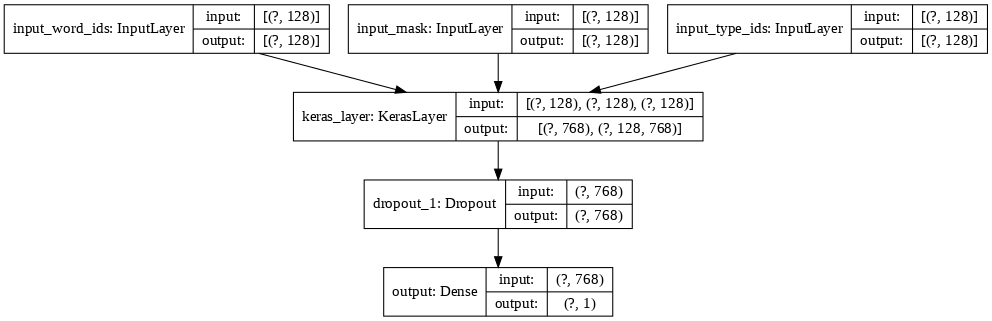

In [44]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76, )

In [45]:
!mkdir -p saved_model
model.save('saved_model/my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


Evaluating the BERT model for text classifiaction task

In [48]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

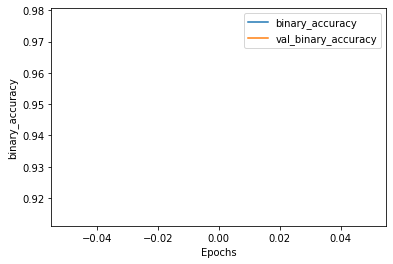

In [49]:
plot_graphs(history, 'binary_accuracy')

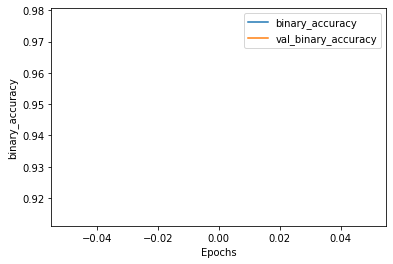

In [50]:
plot_graphs(history, 'binary_accuracy')

In [51]:
model.evaluate(valid_data, verbose=1)

  2/156 [..............................] - ETA: 47s - loss: 0.1432 - binary_accuracy: 0.9531WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0192s vs `on_test_batch_end` time: 0.2761s). Check your callbacks.


156/156 [==============================] - 49s 316ms/step - loss: 0.2792 - binary_accuracy: 0.9143


[0.2791656255722046, 0.9142628312110901]

TESTING CLASSIFIACTION MODEL ON A SINGLE TEXT INSTANCE TO BE A 'TOXIC' OR 'SINCERE' TEXT.

In [55]:
sample_example = ["why allow homosexuality ?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

[' Toxic sentence']

In [57]:
sample_example = ["promises should be kept"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

['Sincere Sentence']

In [58]:
sample_example = ["Negros are dicriminated even today also because of their colour"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

[' Toxic sentence']

In [59]:
sample_example = ["confidence is the key to success"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

['Sincere Sentence']

In [60]:
sample_example = ["How can we earn online genuine sites?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

['Sincere Sentence']

In [61]:
sample_example = ["That was very foolish of you."]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

[' Toxic sentence']

In [62]:
sample_example = ["he is a mischievious fellow"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

[' Toxic sentence']

In [63]:
sample_example = [" What was your reaction on 10th CBSE result?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

['Sincere Sentence']

In [64]:
sample_example = ["Smoking is injurious to health"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
[' Toxic sentence' if pred >=0.5 else 'Sincere Sentence' for pred in preds]

['Sincere Sentence']